##### Problem Statement:
The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). We have a dataset containing images of
cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image.


#### Objectives:
##### Data Preparation:
1. Download and extract the cats vs. dogs dataset.
2. Organize the dataset into a structured directory format suitable for
TensorFlow’s ImageDataGenerator.
3. Split the dataset into training and testing sets.

In [234]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout


In [235]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [236]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [237]:
training_set = train_datagen.flow_from_directory(r"C:\Users\HP\OneDrive\Python_intellipaat\Deep Learning\Convolutional_Neural_Networks\dataset\training_set",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(r'C:\Users\HP\OneDrive\Python_intellipaat\Deep Learning\Convolutional_Neural_Networks\dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


##### Data Augmentation and Preprocessing:
1. Implement data augmentation techniques to increase the diversity of the
training dataset, aiding in the model's ability to generalize.
2. Normalize the pixel values of the images for optimal model performance.
##### Model Building:
1. Construct a Convolutional Neural Network using TensorFlow and Keras.
2. The model should contain multiple convolutional layers, pooling layers, and
fully connected layers.

In [239]:
classifier = Sequential()

In [240]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu',padding='valid'))
classifier.add(BatchNormalization())

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [241]:
# pooling
classifier.add(MaxPool2D(pool_size = (2, 2),padding='valid',strides=2))

In [242]:
#Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPool2D(pool_size = (2, 2)))

In [243]:
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPool2D(pool_size = (2, 2)))

In [244]:
# Step 3 - Flattening
classifier.add(Flatten())

In [337]:
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(1, activation = 'sigmoid'))

In [339]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [380]:
history = classifier.fit(training_set,
                         batch_size = 50,
                         epochs = 20,
                         validation_data = test_set)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 135ms/step - accuracy: 0.9445 - loss: 0.1462 - val_accuracy: 0.8420 - val_loss: 0.4266
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.9466 - loss: 0.1520 - val_accuracy: 0.8520 - val_loss: 0.3889
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.9508 - loss: 0.1316 - val_accuracy: 0.8660 - val_loss: 0.3535
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.9486 - loss: 0.1384 - val_accuracy: 0.8685 - val_loss: 0.3798
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - accuracy: 0.9457 - loss: 0.1413 - val_accuracy: 0.8665 - val_loss: 0.3756
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 144ms/step - accuracy: 0.9490 - loss: 0.1385 - val_accuracy: 0.8210 - val_loss: 0.5903
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 147ms/step - accuracy: 0.9458 - loss: 0.1385 - val_accuracy: 0.8340 - val_loss: 0.4722
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 144ms/step - accuracy: 0.9556 - loss: 0

In [382]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,102,088 (8.02 MB)

 Trainable params: 700,546 (2.67 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,401,094 (5.34 MB)

#### Training:
1. Compile the model and train it on the prepared dataset.
    Utilize categorical cross entropy as the loss function and stochastic
gradient descent as the optimizer.
2. Train the model for a sufficient number of epochs to achieve good
performance.

In [385]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [387]:
import matplotlib.pyplot as plt

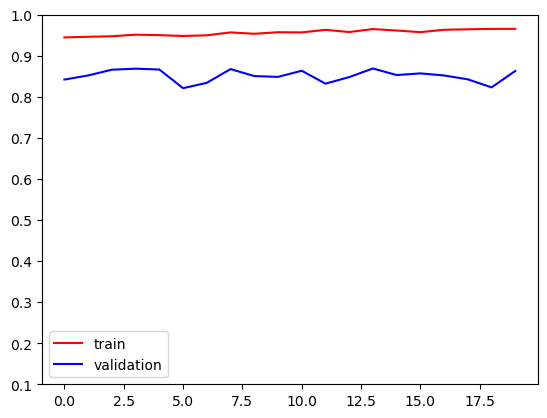

In [391]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.ylim(0.1,1)
plt.show()

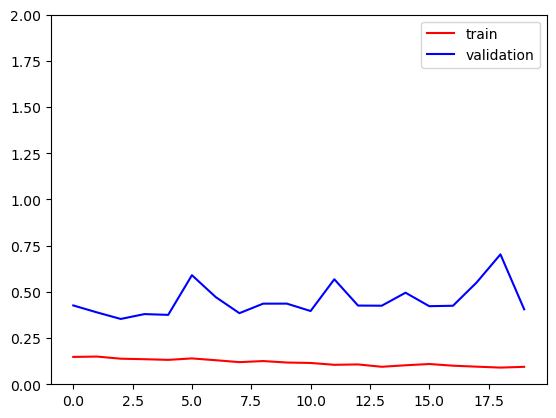

In [393]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.ylim(0,2)
plt.show()

##### Evaluation:
1. Evaluate the model's performance on the validation set during training to
monitor for overfitting.
2. After training, assess the model's accuracy and make predictions on the
test set.
Implement a system to make predictions on new images, categorizing
them as either cat or dog.
3. The system should be able to take an image (or a batch of images),
preprocess it, and pass it through the model for prediction.

In [396]:
import cv2

In [398]:
test_img = cv2.imread(r"C:\Users\HP\OneDrive\Python_intellipaat\Deep Learning\Convolutional_Neural_Networks\Dog4.jpg")

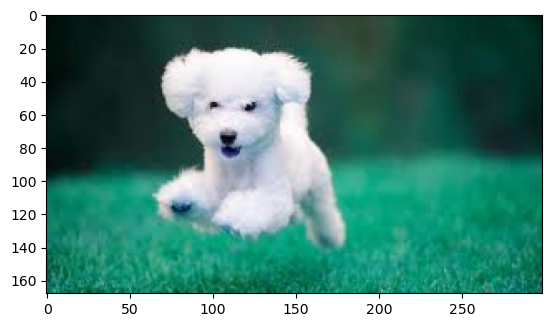

In [400]:
plt.imshow(test_img)

In [402]:
test_img.shape

(168, 299, 3)

In [404]:
test_img = cv2.resize(test_img,(64,64))

In [406]:
#test_img.shape

In [408]:
test_input = test_img.reshape(1,64,64,3)

In [410]:
#test_input.shape

In [412]:
classifier.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[0.99809676]], dtype=float32)

In [414]:
test_img = cv2.imread(r"C:\Users\HP\OneDrive\Python_intellipaat\Deep Learning\Convolutional_Neural_Networks\Dog2.jpg")
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape(1,64,64,3)
classifier.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.99809676]], dtype=float32)

In [416]:
test_img = cv2.imread(r"C:\Users\HP\OneDrive\Python_intellipaat\Deep Learning\Convolutional_Neural_Networks\Cat2.jpg")
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape(1,64,64,3)
classifier.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.00350834]], dtype=float32)

In [418]:
test_img = cv2.imread(r"C:\Users\HP\OneDrive\Python_intellipaat\Deep Learning\Convolutional_Neural_Networks\Cat3.jpg")
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape(1,64,64,3)
classifier.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.00350834]], dtype=float32)